In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor ,XGBClassifier
from sklearn.metrics import r2_score 

In [2]:
df = pd.read_csv('dataset.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [7]:
df["Gender"].fillna('Female', inplace = True)

In [8]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
df["Married"].fillna('No', inplace = True)

In [10]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [11]:
df["Credit_History"].fillna(0.0, inplace = True)

In [12]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
df["Self_Employed"].fillna('Yes', inplace = True)

In [14]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
df = df.replace(['3+'], 4)

In [17]:
df["Dependents"].fillna(4, inplace = True)

In [18]:
df.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [19]:
df["LoanAmount"].fillna(9, inplace = True)

In [20]:
df["Loan_Amount_Term"].fillna(12, inplace = True)

In [21]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
12.0      15
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
Name: Loan_Amount_Term, dtype: int64

In [23]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,9.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: xlabel='Education', ylabel='count'>

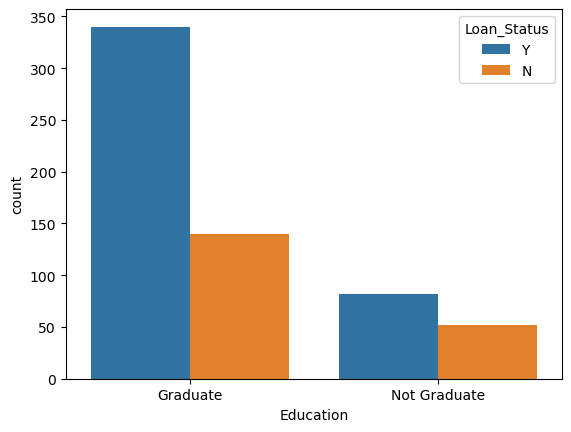

In [24]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

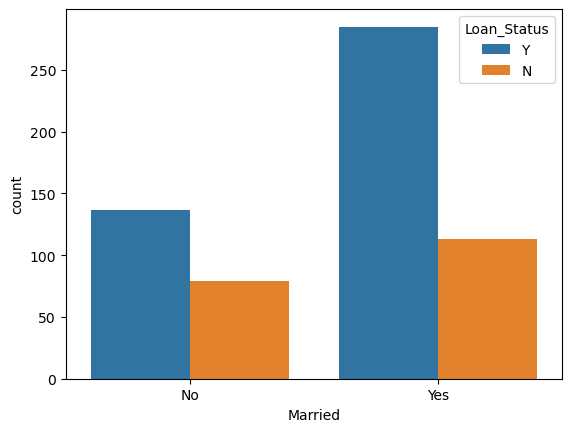

In [25]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

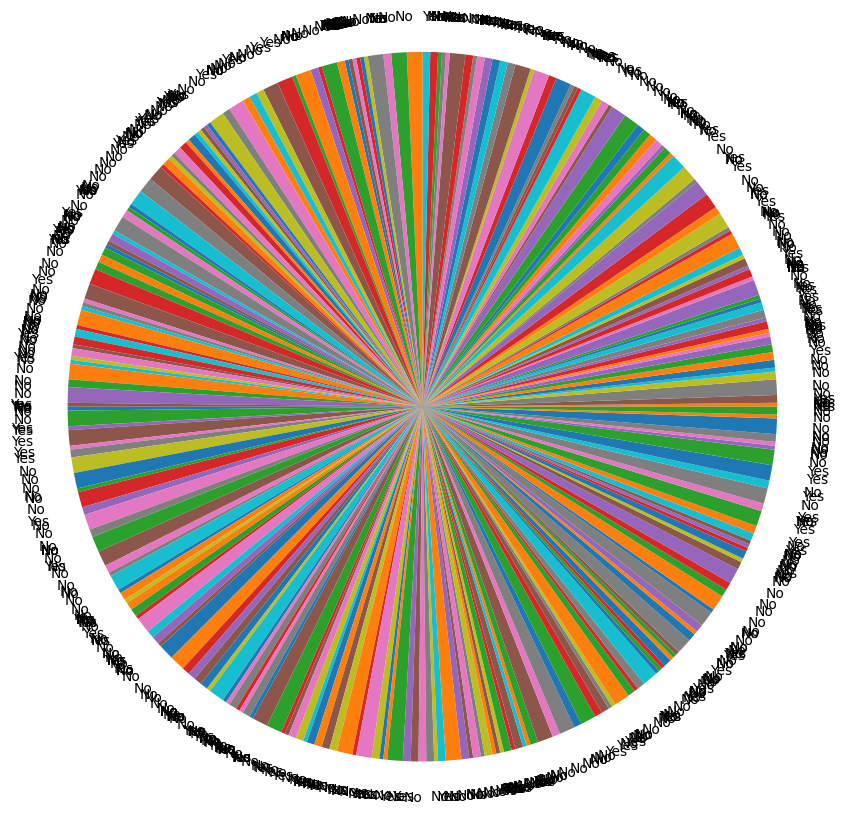

In [26]:

plt.pie(df.Dependents,labels=df.Self_Employed,radius=2.4)
plt.show()

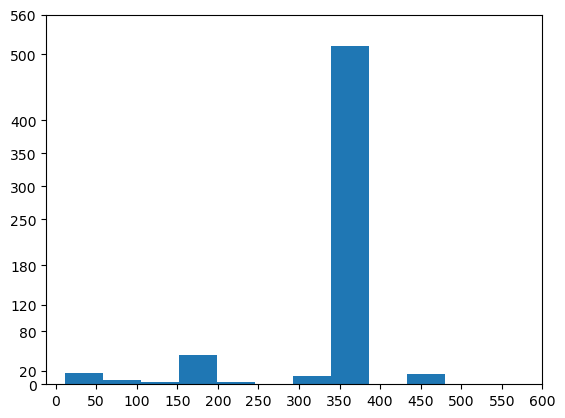

In [27]:

plt.hist(df.Loan_Amount_Term) # histogram
plt.xticks(np.arange(0, 615,50))
plt.yticks([0,20, 80,120 , 180, 250, 300, 350, 400, 500,560])
plt.show()

In [28]:
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Married']= label_encoder.fit_transform(df['Married'])
df['Self_Employed']= label_encoder.fit_transform(df['Self_Employed'])
df['Education']= label_encoder.fit_transform(df['Education'])
df['Property_Area']= label_encoder.fit_transform(df['Property_Area'])
df['Loan_Status']= label_encoder.fit_transform(df['Loan_Status'])

In [29]:
df.drop(['Loan_ID'], axis = 1, inplace = True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,9.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,4,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [30]:
df['Gender'] = df['Gender'].apply(np.int64)
df['Married'] = df['Married'].apply(np.int64)
df['Self_Employed'] = df['Self_Employed'].apply(np.int64)
df['CoapplicantIncome'] = df['CoapplicantIncome'].apply(np.int64)
df['LoanAmount'] = df['LoanAmount'].apply(np.int64)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].apply(np.int64)
df['Credit_History'] = df['Credit_History'].apply(np.int64)
df['Property_Area'] = df['Property_Area'].apply(np.int64)
df['Dependents'] = df['Dependents'].apply(np.int64)
df['Education'] = df['Education'].apply(np.int64)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int64
 1   Married            614 non-null    int64
 2   Dependents         614 non-null    int64
 3   Education          614 non-null    int64
 4   Self_Employed      614 non-null    int64
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  Property_Area      614 non-null    int64
 11  Loan_Status        614 non-null    int32
dtypes: int32(1), int64(11)
memory usage: 55.3 KB


In [33]:
df['Loan_Status'] = df['Loan_Status'].astype('int64')

In [34]:
#x = df.drop(['Loan_Status','Property_Area'], axis = 1, inplace = True)
#y = df 
X = df.drop('Loan_Status',axis='columns')
y = df.Loan_Status

In [35]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int64
 1   Married            614 non-null    int64
 2   Dependents         614 non-null    int64
 3   Education          614 non-null    int64
 4   Self_Employed      614 non-null    int64
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  Property_Area      614 non-null    int64
dtypes: int64(11)
memory usage: 52.9 KB
None


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [78]:
#We create a function that makes it easy for us to train and test any model
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=5)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")
def model_train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Train= {model_train_score *100}%\n{model_name} model score on Test= {model_test_score*100}%")

In [79]:
model = LinearRegression()
model_train(model,'LinearRegression')
kfolds(model,'LinearRegression')

LinearRegression model score on Train= 20.580802485253248%
LinearRegression model score on Test= 17.54360487944904%
LinearRegression score on cross validation: 17.090078849658685%


In [80]:
model_RFR = RandomForestClassifier(n_estimators=20)
model_train(model_RFR,'RandomForestClassifier')
kfolds(model_RFR,'RandomForestClassifier')

RandomForestClassifier model score on Train= 99.34782608695653%
RandomForestClassifier model score on Test= 74.67532467532467%
RandomForestClassifier score on cross validation: 69.05504464880714%


In [81]:
model_s = SVC()
model_train(model_s,'SVC')
kfolds(model_s,'SVC')

SVC model score on Train= 68.47826086956522%
SVC model score on Test= 71.42857142857143%
SVC score on cross validation: 68.72984139677463%


In [82]:
model_XG = XGBClassifier()
model_train(model_XG, "XGBClassifier")
kfolds(model_XG, "XGBClassifier")

XGBClassifier model score on Train= 100.0%
XGBClassifier model score on Test= 77.27272727272727%
XGBClassifier score on cross validation: 72.96947887511662%
